# Simple Linear Regression from scratch

#### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

#### Create a class for Linear Regression

In [2]:
class LinearRegression:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
        #Number of iterations of the Gradient Descent Algorithm
        self.max_iter = 1000000
        
        self.eps=1e-9
        
        #Learning Rate
        self.alpha = 0.0001
        
        #Loss arr
        self.loss_arr = []
        
        
    def stochasticGradientDescent(self):
        
        
        #Initialize w and b with random value
        w = 0.1
        b = 0.1
        alpha = 0.00001
        
        check = True
        iter = 0
        self.loss_arr = []
        while check:
            for j in range(len(self.x)):
                prev_w = w
                prev_b = b
                
                #Calculate y_pred
                y_pred = w * self.x[j] + b
                
                #Update slope
                w = w - alpha * (y_pred - self.y[j]) * self.x[j]
                
                #Update intercept
                b = b - alpha * (y_pred - self.y[j]) * 1
                
                self.loss_arr.append((y_pred - self.y[j])**2)
                
                iter += 1
                
                if (np.abs(w-prev_w) < self.eps and np.abs(b-prev_b) < self.eps) or iter == self.max_iter:
                    check = False
        
        print("Stochastic Gradient Descent algorithm took {} iters to converge".format(iter))
                
        return w,b

    def fit(self):
        #Fit the model
        return np.multiply(self.slope,self.x) + self.intercept
    
    
    def drawPlot(self):
        #Plot the dataset and model
        plt.scatter(self.x, self.y)
        plt.title("Simple Linear Regression")
        plt.xlabel("Salary in USD'000")
        plt.ylabel("Money spent on car purchase in USD'000")
        plt.plot(self.x, self.myModel)
        plt.show()   

#### Importing dataset

In [3]:
dataset = pd.read_csv("Salary_Data.csv") 
#x - Years of Experience (Independent variable)
x =  dataset.iloc[:,:-1].values

#y - Salary (Dependent variable)
y = dataset.iloc[:,1].values

In [4]:
#Create an object of the class
myLinearReg = LinearRegression(x,y)

------------

### Linear Regression

#### In Linear Regression, there are several methods for determining the parameters that minimizes the Loss function. One of them is Gradient Descent.

-----------------------

### Gradient Descent

#### The Mathematics of Gradient Descent

First we define the Hypothesis function - $h_{\theta}x = \theta_0 + \theta_1*x_1 $

Then, we define our cost function - $J(\theta) = (1/2n)\sum_{i=1}^{n} (h_{\theta}x^{(i)}-y^{(i)})^2 $

Next, we define the Gradient Descent update rule - $ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$

Here, $\alpha$ is the learning rate.

Calculating the Partial Derivative of $J(\theta)$

$\frac{\partial}{\partial \theta_j}J(\theta) = \frac{\partial}{\partial \theta_j} \frac{1}{2}(h_{\theta}x-y)^2$

$= 2*\frac{1}{2}*(h_{\theta}x-y)*\frac{\partial}{\partial \theta_j}(h_{\theta}x-y)$

$= 2*\frac{1}{2}*(h_{\theta}x-y)*\frac{\partial}{\partial \theta_j}\sum_{i=0}^{d} (\theta_{i} x_{i}-y)$

$= (h_{\theta}x-y)*x_j$

For a single training example, the Gradient Descent update rule is
$ \theta_j := \theta_j - \alpha (h_{\theta}x-y)*x_j$

The rule is called the LMS update rule (LMS stands for “least mean squares”), and is also known as the Widrow-Hoff learning rule. 

#### Execute the Stochastic Gradient Descent()

In [5]:
myLinearReg.slope, myLinearReg.intercept = myLinearReg.stochasticGradientDescent()
print("This is slope: ", myLinearReg.slope)
print("This is intercept: ", myLinearReg.intercept)

Stochastic Gradient Descent algorithm took 1000020 iters to converge
This is slope:  [9875.77312856]
This is intercept:  [22917.7915499]


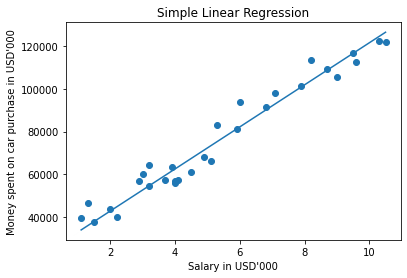

In [6]:
myLinearReg.myModel = myLinearReg.fit()
myLinearReg.drawPlot()

In [7]:
print("This is the length of loss_arr: ", len(myLinearReg.loss_arr))

This is the length of loss_arr:  1000020


In [8]:
iter_arr = [x for x in range(len(myLinearReg.loss_arr))]

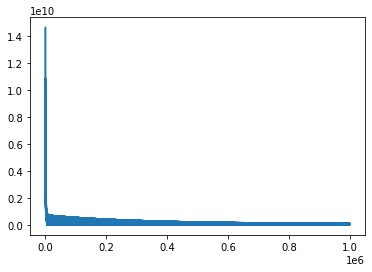

In [9]:
plt.plot(iter_arr, myLinearReg.loss_arr)
plt.show()   